In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import qutip as qt
import math

In [2]:
def gaussian_sqrt(_t, _mu=0., _sigma=1.):
    x = float(_t-_mu) / _sigma
    return math.sqrt(math.exp( - x*x/2.) / math.sqrt(2 * np.pi) / _sigma)

In [3]:
def g_u_gaussian(_t, _args):
    mu = _args['mu']
    sigma = _args['sigma']
    x = (_t - mu) / (math.sqrt(2)*sigma)
    denominator = math.sqrt(1 - 0.5*(1 + sp.special.erf(x)))
    return gaussian_sqrt(_t, mu, sigma) / denominator

In [4]:
MU = 4
SIGMA = 1
tlist = np.linspace(0, MU + 4*SIGMA, 10000)
gaussian_values = [ gaussian_sqrt(t,4.) for t in tlist ]
g_u_gaussian_sq = [ np.abs(g_u_gaussian(t,_args={'mu':MU,'sigma':SIGMA}))**2 for t in tlist]


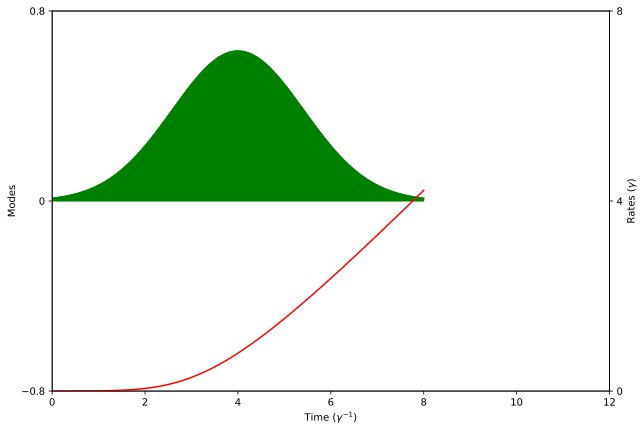

In [5]:
fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax1.set_ylabel('Modes')
ax1.plot(tlist, gaussian_values, '-g')
ax1.fill_between(tlist, gaussian_values, color='green')
ax1.set_xlabel('Time ($\gamma^{-1}$)')
ax1.set_xlim(0, 12)
ax1.set_xticks([0., 2, 4, 6, 8, 10, 12],
               labels=["$0$", "$2$", "$4$", "$6$", "$8$", "$10$", "$12$"])
ax1.set_yticks([-0.8, 0, 0.8], labels=["$-0.8$", "$0$", "$0.8$"])

ax2 = ax1.twinx()
ax2.set_ylabel('Rates ($\gamma$)')
ax2.plot(tlist, g_u_gaussian_sq, '-r')
ax2.set_ylim(0, 8)
ax2.set_yticks([0,4,8], labels=["$0$", "$4$", "$8$"])

plt.show()

In [6]:
adaga_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp/adaga_expect_values.dat")
cdagc_expect_values = np.loadtxt("../outputs/results_kiilerichmolmer_qp/cdagc_expect_values.dat")

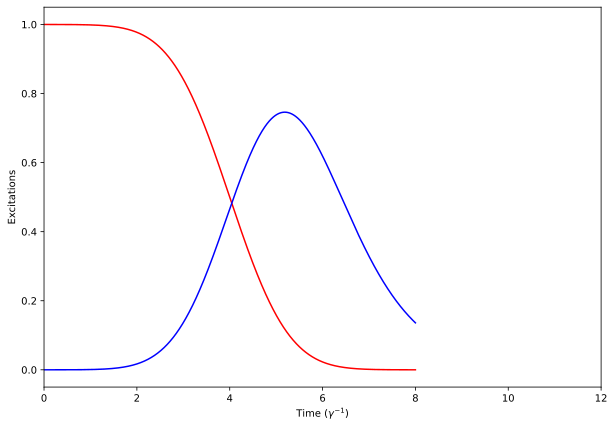

In [7]:
fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax1.set_ylabel('Excitations')
ax1.plot(tlist, adaga_expect_values, '-r')
ax1.plot(tlist, cdagc_expect_values, '-b')
ax1.set_xlabel('Time ($\gamma^{-1}$)')
ax1.set_xlim(0, 12)
ax1.set_xticks([0., 2, 4, 6, 8, 10, 12],
               labels=["$0$", "$2$", "$4$", "$6$", "$8$", "$10$", "$12$"])
plt.show()

In [8]:
in_one_photon = np.loadtxt("../outputs/results_kiilerichmolmer_qp_fig4/input_one_photon.dat")
out_one_photon = np.loadtxt("../outputs/results_kiilerichmolmer_qp_fig4/output_one_photon.dat")
out_two_photon = np.loadtxt("../outputs/results_kiilerichmolmer_qp_fig4/output_two_photon.dat")
excited_atom = np.loadtxt("../outputs/results_kiilerichmolmer_qp_fig4/excited_atom.dat")

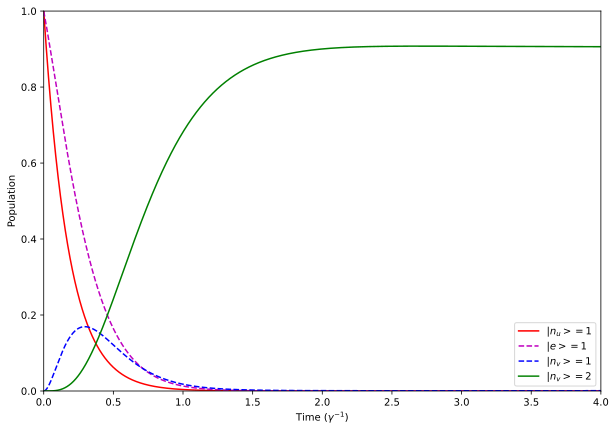

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

tlist = np.linspace(0,4,10000)

ax.plot(tlist, in_one_photon, '-r', label='$|n_{u}> = 1$')
ax.plot(tlist, excited_atom, '--m', label='$|e> = 1$')
ax.plot(tlist, out_one_photon, '--b', label='$|n_{v}> = 1$')
ax.plot(tlist, out_two_photon, '-g', label='$|n_{v}> = 2$')
ax.set_xlim(0,4)
ax.set_xlabel('Time ($\gamma^{-1}$)')
ax.set_ylim(0,1)
ax.set_ylabel('Population')
ax.legend()

plt.show()